# Homework 12
## Time Series Analysis
### Ali Asghar Yousuf
### ay06993@st.habib.edu.pk

In [42]:
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt
import tweepy as tw
import nltk
import json
import yake
import re
import spacy
from rake_nltk import Rake
from bs4 import BeautifulSoup
from spacy import displacy
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator


In [43]:
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\ali\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ali\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\ali\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [44]:
nlp = spacy.load("en_core_web_sm")

### Q1

Name Entity Relation Analysis

In [45]:
article_url = "https://www.dawn.com/news/1781615" 

In [46]:
def url_to_string(url):
    res = requests.get(url)
    html = res.text
    soup = BeautifulSoup(html, 'html.parser')
    for script in soup(["script", "style", 'aside']):
        script.extract()
    return " ".join(re.split(r'[\n\t]+', soup.get_text()))

In [47]:
article_text = url_to_string(article_url)
article_doc = nlp(article_text)
for entity in article_doc.ents:
    print(f"{entity.text} ({entity.label_})")

Pakistan (GPE)
World Cup (EVENT)
1 (CARDINAL)
Cambodia (GPE)
Today (DATE)
December 09 (DATE)
Gaza (GPE)
Pakistan (GPE)
Gaza (GPE)
Pakistan (GPE)
Pakistan (GPE)
World Cup (EVENT)
1 (CARDINAL)
Cambodia (GPE)
Published October 17, 2023 (DATE)
0 (CARDINAL)
Pakistan (GPE)
first (ORDINAL)
World Cup (EVENT)
Cambodia (GPE)
October 17 (DATE)
2023.—Photo (CARDINAL)
Pakistan (GPE)
Pakistan (GPE)
Tuesday (DATE)
first (ORDINAL)
World Cup (EVENT)
Cambodia (GPE)
Harun Hamid Khan’s (PERSON)
68th-minute (TIME)
the Jinnah Stadium (FAC)
Islamabad (GPE)
Cambodia (GPE)
Pakistan (GPE)
second (ORDINAL)
2026 (DATE)
Saudi Arabia (GPE)
Jordan (GPE)
Tajikistan (NORP)
Group G (ORG)
second (ORDINAL)
Anadolu Agency (ORG)
first (ORDINAL)
two (CARDINAL)
last week (DATE)
Cambodia (GPE)
eight-year (DATE)
Pakistan (GPE)
2 (CARDINAL)
Afghanistan (GPE)
Lahore (GPE)
February 2015 (DATE)
two (CARDINAL)
World Cup (EVENT)
first (ORDINAL)
2018 (DATE)
Yemen (GPE)
Bahrain (GPE)
Lahore (GPE)
2022 (DATE)
Cambodia (GPE)
Doha (GPE)


In [48]:
displacy.render(article_doc, style="ent")

The article I chose for the NER analysis is based on Pakistan's win over Cambodia in the round Fifa world cup qualifiers which happened in Islamabad earlier this year. Since the article referred to Pakistan and Cambodia a lot, one of the most important entity were GPE. There were also some wrongly highlighted words, such as Tajikistan being highlighted as NORP, when every other country is highlighted as GPE. The next next most important entity is event, since the article frequently talks about the World Cup. 

### Q2

Word frequency and keyword extraction analysis

In [49]:
import tika
tika.initVM()
from tika import parser

raw = parser.from_file("Optimizing_Illumination__Using_an_Evolutionary_Algorithm_to_Balance_Artificial_and_Natural_Light_in_Rooms.pdf")

In [50]:
tokenize_words = nltk.tokenize.word_tokenize(raw['content'])
stopwords = nltk.corpus.stopwords.words('english')
stopwords.extend(["T", "J", "D", "S", "M", "H", "et al", "et",
                 "pp", "a.", "m.", "d.", "j.", "s.", "r.", "c.", "t."])
no_stopwords = [word for word in tokenize_words if word.lower()
                not in stopwords]
nonPunct = re.compile('.*[A-Za-z].*')
clean_words = [w for w in no_stopwords if nonPunct.match(w)]
filtered_word_freq = nltk.FreqDist(clean_words)

In [51]:
filtered_word_freq.most_common(20)

[('room', 57),
 ('light', 53),
 ('number', 41),
 ('lights', 41),
 ('fitness', 31),
 ('function', 31),
 ('chromosome', 28),
 ('tiles', 24),
 ('window', 23),
 ('selection', 16),
 ('sunlight', 14),
 ('population', 14),
 ('value', 14),
 ('used', 13),
 ('genetic', 13),
 ('optimization', 13),
 ('Fig', 13),
 ('genes', 13),
 ('also', 12),
 ('lit', 12)]

As the trend shows that the value of bitcoin is increasing with proper prograganda integerated with the seasonal 
trend. The residual stills shows that there are some erros but analyzing it closely we can see that most of the values lies close to 0 which means the error is neglible. There are also not much residuals so it means that we can work on this data and can predict the weather update of Karachi.

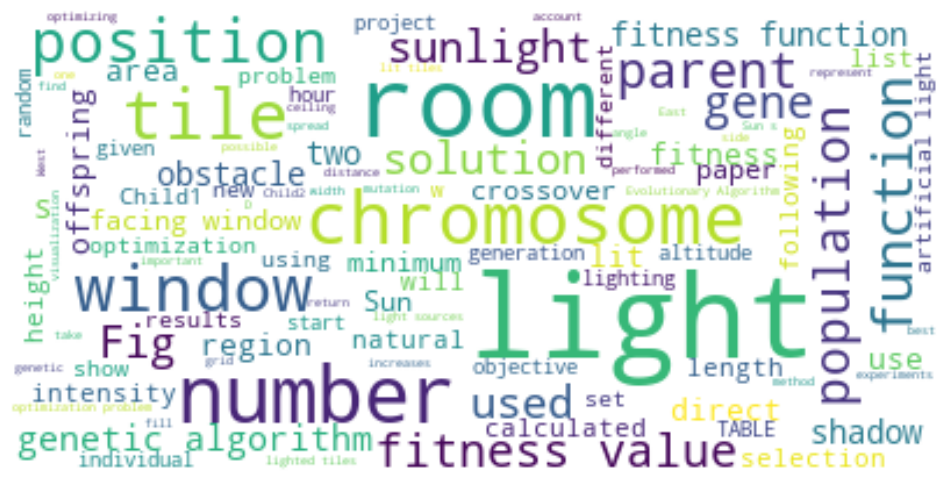

In [52]:
plt.rcParams['figure.figsize'] = [12, 8]
wordcloud = WordCloud(max_font_size=50, max_words=100,
                      background_color="white").generate(raw['content'])
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

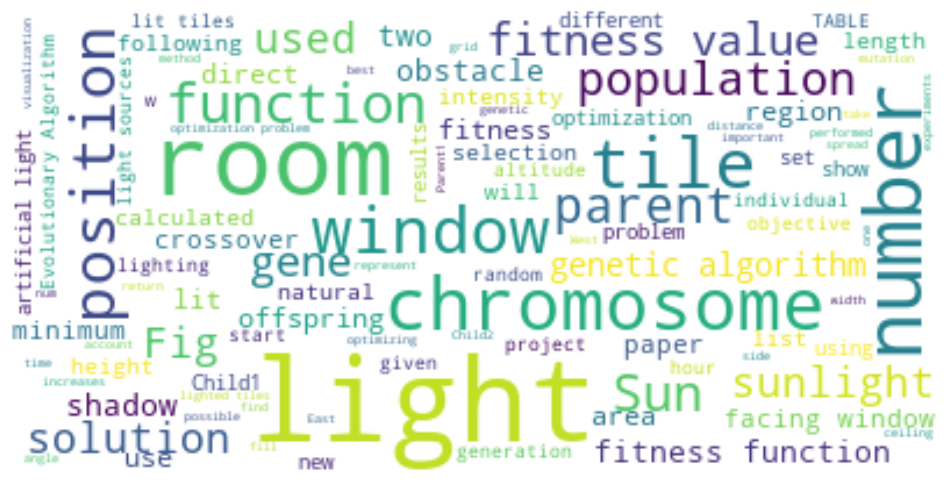

In [53]:
stopwords = set(STOPWORDS)
stopwords.update(["T", "J", "D", "S", "M", "H", "et al", "et", "al"])
wordcloud = WordCloud(stopwords=stopwords, max_font_size=50,
                      max_words=100, background_color="white").generate(raw['content'])
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [54]:
r = Rake()
r.extract_keywords_from_text(raw['content'])
r.get_ranked_phrases_with_scores()[:10]

[(57.0457671957672,
  'crossover points parent1 parent2 gene1 gene2 start gene end gene [( 1'),
 (39.9031624148008,
  '5 possible solutions chromosome num lit tiles num lights fitness [( 0'),
 (34.5, '2148 syed ibrahim ali haider department'),
 (25.681265031265035, 'table iii offspring child1 child2 offspring [( 1'),
 (25.0, 'rooms ali asghar chakera department'),
 (24.2, 'computer science habib university karachi'),
 (24.2, 'computer science habib university karachi'),
 (24.2, 'computer science habib university karachi'),
 (24.2, 'computer science habib university karachi'),
 (23.696301205765682, '0 )] 99 5 47 [( 1')]

In [55]:
nlp = spacy.load('en_core_web_sm')
doc2 = nlp(raw['content'])
print(doc2.ents)

(Balance Artificial and Natural Light, Ali Asghar Chakera, Department of Computer Science
Habib University, Karachi, Pakistan, 0009-0007-2038-9139, Hafsa Khurram
Department of Computer Science

Habib University
Karachi, Pakistan, 0009-0006-1400-2148, Ali Haider, Department of Computer Science

Habib University, Karachi, Pakistan, 0009-0000-2714-992X, Department of Computer Science

Habib University, Karachi, Pakistan, Compu-, Intelligence (CI, 15%, Artificial Light Optimization, five, 100, 10 ∗ 10, A. Motivation, Optimizing Artificial Lighting, 1, II, one, 5, 5, three, 5, Genetic Algorithms, 5, 1, 2, f(x, 3, two, 4, 5, 6, 2, DESCRIPTION

, A. Tiles, 1, 10× 10, WidthRoom/10, 1, LengthTile = LengthRoom/10, 2, Tile, three, 2, Tile, 3, eight, 8, 0.6 ie, 60%, Tile, Fig, 1, Fig, 2, Beam Angle Visualisation, 4, Fig, 3, C. Windows, four, North, South, East, max, • Length, Sun, Sunaltitude, the day, 4, 90, Sunlight, one, 3, 4, − sunlightmin, D., 1, Pythagoras, √, 5, 2, Euclidean, 5, 3, 0.2, 4, 

In [56]:
kw_extractor = yake.KeywordExtractor()
language = "en"
max_ngram_size = 2
deduplication_threshold = 0.9
numOfKeywords = 20
custom_kw_extractor = yake.KeywordExtractor(
    lan=language, n=max_ngram_size, dedupLim=deduplication_threshold, top=numOfKeywords, features=None)
keywords = custom_kw_extractor.extract_keywords(raw['content'])
for kw in keywords:
    print(kw)

('Light', 0.0020767118339821583)
('room', 0.0026564613462091245)
('lights', 0.0029073965675750217)
('number', 0.0065656582753894095)
('fitness', 0.006877959008052662)
('fitness function', 0.0077306092382425935)
('direct light', 0.008423036522040923)
('tiles', 0.00867974157131696)
('light positions', 0.008850089722454348)
('chromosome', 0.009216452558478635)
('window', 0.009486269840579533)
('function', 0.010424518080023539)
('light sources', 0.01066613996672185)
('Natural Light', 0.011419073152810759)
('artificial light', 0.012521264330355096)
('facing Window', 0.01553030074220435)
('Tile', 0.01562353482837053)
('Sun', 0.015633501800513747)
('genetic algorithms', 0.019979196820624826)
('Computer Science', 0.020221458382341538)


Frequency Distribution (FreqDist) initially identified recurring words, yet it included stopwords, necessitating further refinement to highlight contextually relevant terms. RAKE algorithm offered a more nuanced approach, considering not just word frequency but also co-occurrence, thereby emphasizing keywords integral to the text's themes. Complementing this, YAKE applied a unique feature weighting and word scoring system to prioritize words based on their contextual relationships. This method further refined the keyword extraction, ensuring a focus on terms crucial for understanding the paper's key concepts.

### Q3

Scrap tweets from twitter

#### nvm musk doesnt allow retrieving tweets from twitter for free anymore

In [66]:
# Part-1: Authorization and Search tweets
# Getting authorization
import os
import dotenv

dotenv.load_dotenv()

bearer_token = os.environ.get('BEARER_TOKEN')
print(bearer_token)
auth = tw.OAuth2BearerHandler(bearer_token)
api = tw.API(auth)


AAAAAAAAAAAAAAAAAAAAAHagrQEAAAAAj1PMLPuTYoQArpDsQJlA%2FZQYD2Y%3DR3z7gn1zs2dL1lOAxNji5m2TVonZPk1v5nyxwZs9m2mYd3UiDY


In [69]:
# Create a custom search term and define the number of tweets
search_term = " #BabarAzam -filter:retweets"

tweets = tw.Cursor(api.search_tweets,
                   q=search_term + 'since:2023-12-05',
                   lang="en").items(10)


In [71]:
searched_tweets = [t for t in tweets]

In [ ]:
#Part-3: Creating Dataframe of Tweets

#Cleaning searched tweets and converting into Dataframe
my_list_of_dicts = []
for each_json_tweet in searched_tweets:
    my_list_of_dicts.append(each_json_tweet._json)
    
with open('tweet_json_ForcedConversion.txt', 'w') as file:
        file.write(json.dumps(my_list_of_dicts, indent=4))
        
my_demo_list = []
with open('tweet_json_ForcedConversion.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        text = each_dictionary['text']
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        created_at = each_dictionary['created_at']
        my_demo_list.append({'tweet_id': str(tweet_id),
                             'text': str(text),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'created_at': created_at,
                            })
        
        tweet_dataset = pd.DataFrame(my_demo_list, columns = 
                                  ['tweet_id', 'text', 
                                   'favorite_count', 'retweet_count', 
                                   'created_at'])
    
#Writing tweet dataset ti csv file for future reference
tweet_dataset.to_csv('tweet_ForcedConversion_Data.csv',index=False)

In [ ]:
def remove_url(txt):
    # Replace URLs found in a text string with nothing
    return " ".join(re.sub("([^0-9A-Za-z \t])|(\w+:\/\/\S+)", "", txt).split())

In [ ]:
# Removing @ handle
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)

    return input_txt

In [ ]:
tweet_dataset['text'] = np.vectorize(remove_url)(tweet_dataset['text'])
tweet_dataset['text'] = np.vectorize(
    remove_pattern)(tweet_dataset['text'], "@[\w]*")
tweet_dataset.to_csv('clean_tweets.csv',index=False)

#### Adding Tweets Manually

In [119]:
def read_tweets(filename):
    with open(filename, 'r', encoding='utf-8') as file:
        return file.readlines()

#### Part a

In [120]:
import pandas as pd

tweets = read_tweets('tweets.txt')
tweet_df = pd.DataFrame(tweets, columns=['tweet'])

#### Part b

Sentiment Anaylsis

In [122]:
def tweet_sentiment(txt):
   analysis = TextBlob(txt)
   if analysis.sentiment.polarity > 0:
      res = 'positive'
   elif analysis.sentiment.polarity < 0:
      res = 'negative'
   else:
      res = 'neutral'
   return (res)

In [123]:
tweet_df['sentiment'] = np.vectorize(
    tweet_sentiment)(tweet_df['tweet'])

In [124]:
tweet_df['sentiment'].value_counts()

positive    9
neutral     5
negative    1
Name: sentiment, dtype: int64

There are a total of 15 tweets related to Babar Azam out of which the algorithm classified 9 as positive, 1 as negative and the rest as neutral

#### Part c

Discuss the results

In [125]:
tweet_df[tweet_df['sentiment'] == 'positive'].head(1)

,tweet,sentiment
0,It's not easy to defeat ban in ban. Ind Lost u...,positive


In [126]:
tweet_df[tweet_df['sentiment'] == 'negative'].head(1)

,tweet,sentiment
6,selfish babar azam dead rubber match me b khud...,negative


Taking a look at one of the positive tweets we can see that the tweet is actually positive it compares Babar Azam with other captains and shows that he is the best. When we look at the negative tweet we can see that the tweet is calling Babar selfish which is indeed a negative thing.